## Dynamical systems, SINDy, discovering models, etc.

### Chaotic Lorenz System 

$$ \dot{x} = \sigma(y-x)$$
$$ \dot{y} = x(\rho - z) - y$$
$$ \dot{z} =  xy - \beta z$$

As a first example consider a canonical model for chaotic dynamics, the Lorenz system.

Consider first the parameters $\sigma = 10$, $\rho = 28$ , $\beta=8/3$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [106]:
## Defining the parameters 
sigma = 10
rho = 28
beta = 8/3

## Defining the inicial state of the system
initial_state = [0,1,20]


# define the time points to solve
start_time = 1
end_time = 60
interval = 100
n = end_time*interval

time_points = np.linspace(start_time, end_time, end_time*interval)



In [107]:
def lorenz_chaotic_system(actual_state, t, sigma, beta, rho): ## The Chaos Lorenz system
    x, y, z = actual_state
    dx_dt = sigma*(y - x)
    dy_dt = x*(rho-z) - y
    dz_dt = x*y - beta*z
    return [dx_dt, dy_dt, dz_dt]


In [108]:
f = odeint(lorenz_chaotic_system, initial_state, time_points,args=(sigma, beta, rho))
x, y, z = f.T

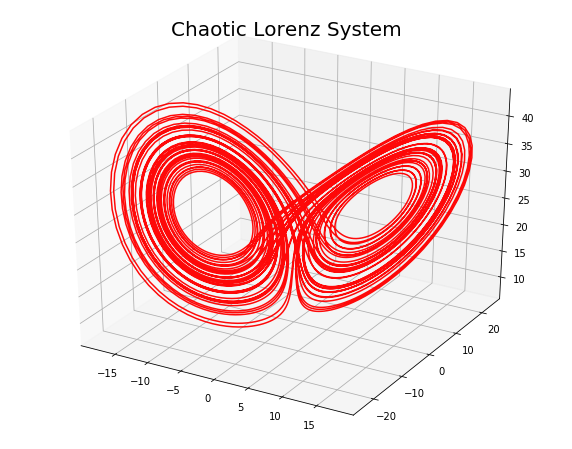

In [109]:
## Ploting the solution

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot(x, y, z,color = 'red',alpha=10)
plt.title('Chaotic Lorenz System', fontsize=20)
plt.show()

### Now, with the data we will search the governing equations that generates the data.

In [110]:
from pySINDy.sindy import SINDy ## Library for SINDy by Brunton

In [111]:
model = SINDy(name='Lorenz System')

In [112]:
data = f
dt = 0.01

In [113]:
data.T[2]

array([20.        , 19.48274747, 18.97974035, ..., 18.3611841 ,
       17.956996  , 17.57028172])

In [114]:
model.fit(data.T, dt, poly_degree=5, cut_off=0.01)

In [115]:
model.coefficients.T[0]

array([ 0.        , -9.81405093,  9.81410701,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [116]:
model.coefficients.T[1]

array([ 0.        , 27.34859941, -0.94632957,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.97821755,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [117]:
model.coefficients.T[2]

array([ 0.        ,  0.        ,  0.        , -2.61545479,  0.        ,
        0.98078377,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [118]:
model.descriptions

['1',
 'u0',
 'u1',
 'u2',
 'u0^{2}',
 'u0u1',
 'u2^{2}',
 'u1u2',
 'u1^{2}',
 'u0u2',
 'u2^{3}',
 'u1u2^{2}',
 'u0u2^{2}',
 'u1^{2}u2',
 'u0^{2}u2',
 'u0u1u2',
 'u0^{2}u1',
 'u1^{3}',
 'u0u1^{2}',
 'u0^{3}',
 'u0u1^{3}',
 'u0^{2}u2^{2}',
 'u1^{2}u2^{2}',
 'u1^{3}u2',
 'u0u1^{2}u2',
 'u0^{3}u1',
 'u0^{4}',
 'u0^{2}u1u2',
 'u1u2^{3}',
 'u0^{3}u2',
 'u0^{2}u1^{2}',
 'u2^{4}',
 'u1^{4}',
 'u0u2^{3}',
 'u0u1u2^{2}',
 'u0^{2}u2^{3}',
 'u1^{3}u2^{2}',
 'u0u1u2^{3}',
 'u0u1^{2}u2^{2}',
 'u1^{2}u2^{3}',
 'u0u2^{4}',
 'u0^{2}u1u2^{2}',
 'u1^{4}u2',
 'u0^{5}',
 'u0u1^{3}u2',
 'u0^{2}u1^{2}u2',
 'u0^{3}u1u2',
 'u1u2^{4}',
 'u0^{4}u1',
 'u0^{4}u2',
 'u0^{3}u1^{2}',
 'u1^{5}',
 'u0u1^{4}',
 'u0^{2}u1^{3}',
 'u0^{3}u2^{2}',
 'u2^{5}']

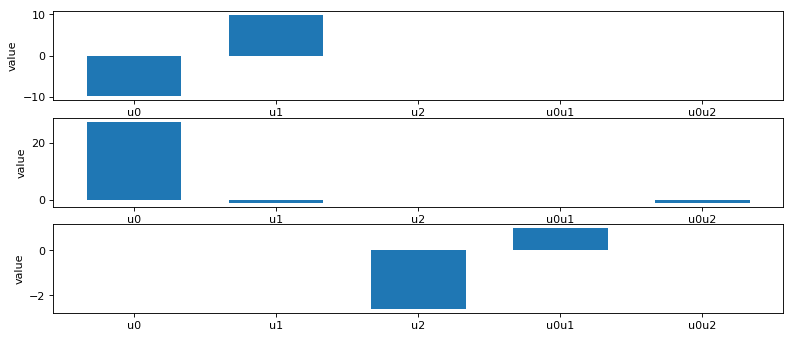

In [119]:
model.plot_coefficients

### Identified model


$$ \dot{x} = 9.8y-9.8x$$
$$ \dot{y} = 27.35x - 0.948y - 0.97xz$$
$$ \dot{z} =  0.98xy - 2.615z$$

Is the same model that generates the data, of course with some numerical approximations.


## Another example 

### Two dimensional damped oscillator
In this example, we consider the two-dimensional damped harmonic oscillator with either linear dynamics, or with cubic dynamics. 

$$ \frac{d x(t)}{dt} = -0.1x(t) + 2y(t)$$
$$ \frac{d y(t)}{dt} = -2x(t) + 0.1y(t)$$


Or another system

$$ \frac{d x(t)}{dt} = -0.1x^3(t) + 2y^3(t)$$
$$ \frac{d y(t)}{dt} = -2x^3(t) - 0.1y^3(t)$$



In [41]:
def twod_linear_damped_oscillator(actual_state, t):
    x, y = actual_state
    dx_dt = -0.1*x + 2*y 
    dy_dt = -2*x - 0.1*y
    return [dx_dt, dy_dt]


In [42]:
initial_state=[2,0]


# define the time points to solve
start_time = 1
end_time = 60
interval = 100
n = end_time*interval

time_points = np.linspace(start_time, end_time, end_time*interval)

In [43]:
f = odeint(twod_linear_damped_oscillator, initial_state, time_points)
x, y= f.T

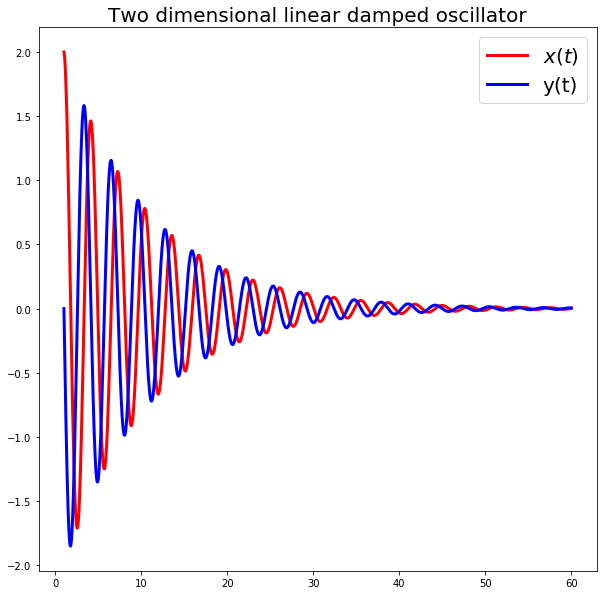

In [50]:
plt.figure(figsize=(10,10))
plt.title("Two dimensional linear damped oscillator", fontsize=20)
plt.plot(time_points,x,color='red', linewidth=3)
plt.plot(time_points,y,color='b',linewidth=3)
plt.legend(('$x(t)$', 'y(t)'),
           loc='upper right', fontsize=20)
plt.show()

### Now, with the data we will search the governing equations that generates the data.

In [51]:
model2 = SINDy(name='Damped Oscillator linear')

In [58]:
data = f
dt = 0.01

In [59]:
model2.fit(data.T, dt, poly_degree=5, cut_off=0.01)

In [61]:
model2.coefficients.T[0]

array([ 0.        , -0.09833099,  1.9668686 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [62]:
model2.coefficients.T[1]

array([ 0.        , -1.96687039, -0.09833075,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [64]:
model2.descriptions

['1',
 'u0',
 'u1',
 'u0^{2}',
 'u0u1',
 'u1^{2}',
 'u0^{3}',
 'u0^{2}u1',
 'u0u1^{2}',
 'u1^{3}',
 'u0^{4}',
 'u1^{4}',
 'u0^{3}u1',
 'u0^{2}u1^{2}',
 'u0u1^{3}',
 'u0^{2}u1^{3}',
 'u0^{4}u1',
 'u0u1^{4}',
 'u0^{5}',
 'u0^{3}u1^{2}',
 'u1^{5}']

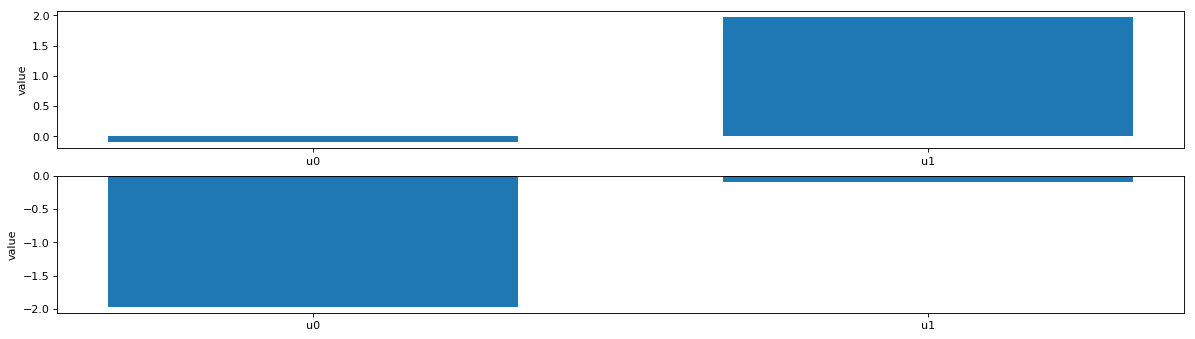

In [104]:
model2.plot_coefficients

### Discovered system

$$\frac{d x(t)}{dt} = -0.09833099x(t) + 1.9668686y(t)$$
$$\frac{d y(t)}{dt} = -1.96687039x(t) - 0.09833075y(t)$$

In [67]:
def discovered_twod_linear_damped_oscillator(actual_state, t):
    x, y = actual_state
    dx_dt = -0.09833099*x + 1.9668686*y 
    dy_dt = -1.96687039*x - 0.09833075*y
    return [dx_dt, dy_dt]


In [68]:
f_disc = odeint(discovered_twod_linear_damped_oscillator, initial_state, time_points)
x_disc, y_disc= f_disc.T

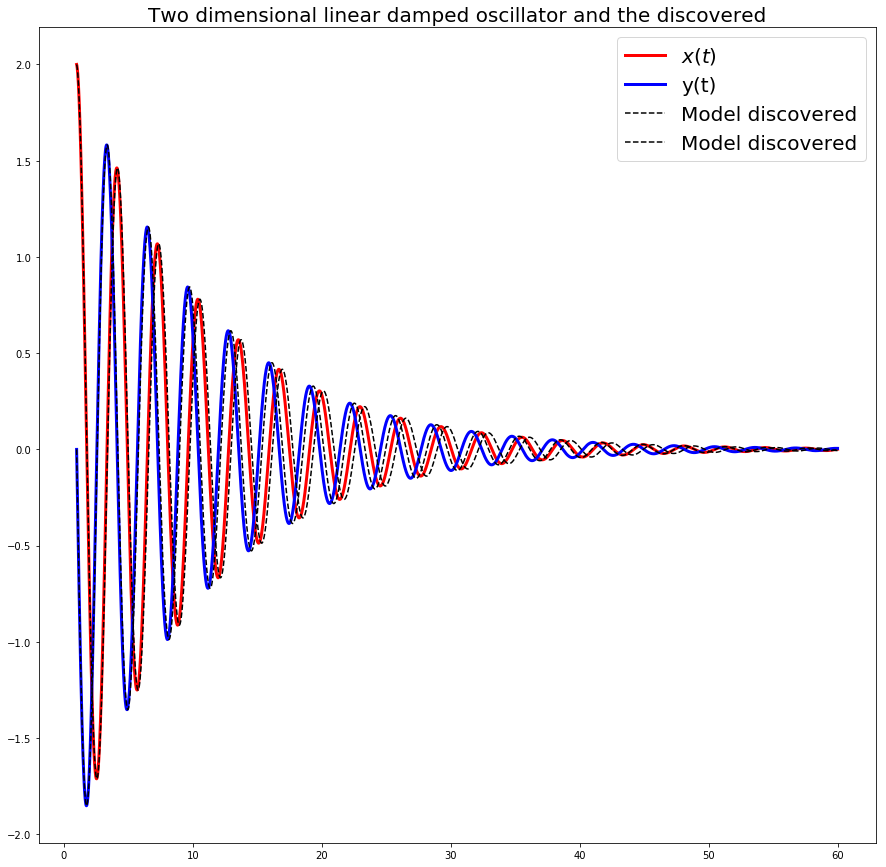

In [83]:
plt.figure(figsize=(15,15))
plt.title("Two dimensional linear damped oscillator and the discovered", fontsize=20)
plt.plot(time_points,x,color='red', linewidth=3)
plt.plot(time_points,y,color='b',linewidth=3)
plt.plot(time_points,x_disc,'--k')
plt.plot(time_points,y_disc,'--k')
plt.legend(('$x(t)$', 'y(t)','Model discovered','Model discovered'),
           loc='upper right', fontsize=20)
plt.show()

### The second example

In [87]:
def twod_cubic_damped_oscillator(actual_state, t):
    x, y = actual_state
    dx_dt = -0.1*x**3 + 2*y**3
    dy_dt = -2*x**3 - 0.1*y**3 
    return [dx_dt, dy_dt]


In [88]:
initial_state=[2,0]

# define the time points to solve
start_time = 1
end_time = 60
interval = 100
n = end_time*interval

time_points = np.linspace(start_time, end_time, end_time*interval)

fcubic = odeint(twod_cubic_damped_oscillator, initial_state, time_points)
xcubic, ycubic= fcubic.T

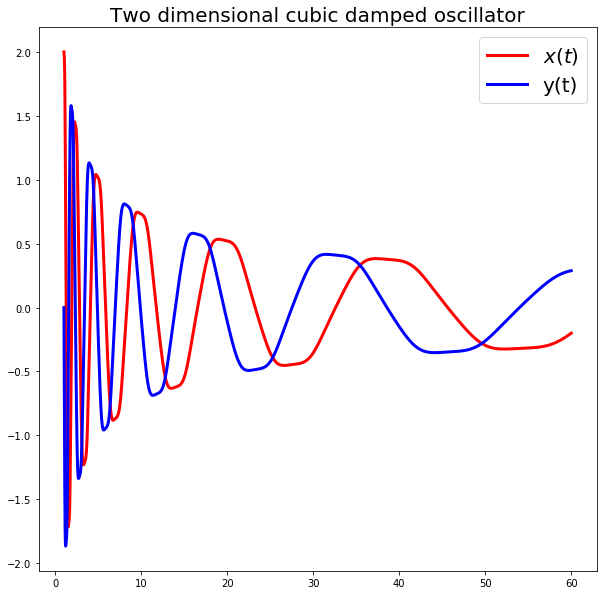

In [90]:
plt.figure(figsize=(10,10))
plt.title("Two dimensional cubic damped oscillator", fontsize=20)
plt.plot(time_points,xcubic,color='red', linewidth=3)
plt.plot(time_points,ycubic,color='b',linewidth=3)
plt.legend(('$x(t)$', 'y(t)'),
           loc='upper right', fontsize=20)
plt.show()

In [89]:
model3 = SINDy(name='Damped Oscillator cubic')

In [92]:
model3 = SINDy(name='Damped Oscillator linear')

data = fcubic
dt = 0.01

model3.fit(data.T, dt, poly_degree=5, cut_off=0.01)

In [95]:
model3.coefficients.T[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.09857225,  0.        ,  0.        ,  1.96599518,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [96]:
model3.coefficients.T[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.96589373,  0.        ,  0.        , -0.09807668,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

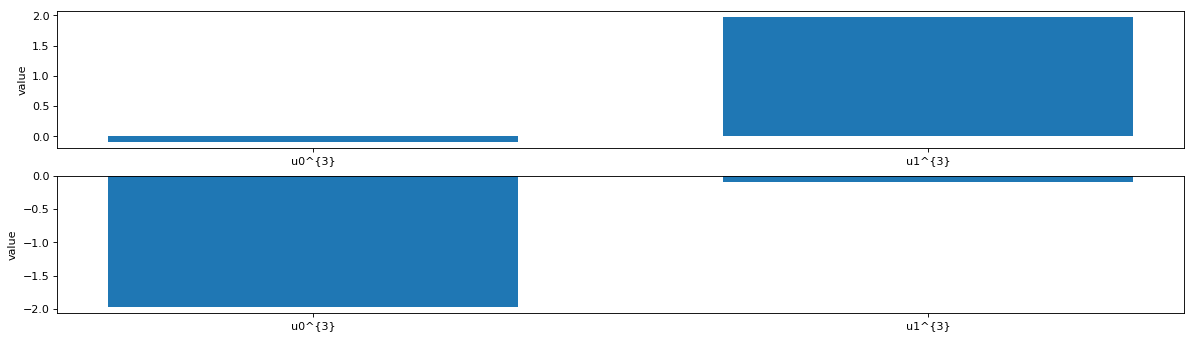

In [103]:
model3.plot_coefficients

In [97]:
model3.descriptions

['1',
 'u0',
 'u1',
 'u0^{2}',
 'u0u1',
 'u1^{2}',
 'u0^{3}',
 'u0^{2}u1',
 'u0u1^{2}',
 'u1^{3}',
 'u0^{4}',
 'u1^{4}',
 'u0^{3}u1',
 'u0^{2}u1^{2}',
 'u0u1^{3}',
 'u0^{2}u1^{3}',
 'u0^{4}u1',
 'u0u1^{4}',
 'u0^{5}',
 'u0^{3}u1^{2}',
 'u1^{5}']

### Discovered system
$$ \frac{d x(t)}{dt} = -0.09857225x^3(t) + 1.96599518y^3(t)$$
$$ \frac{d y(t)}{dt} = -1.96589373x^3(t) - 0.09807668y^3(t)$$




In [98]:
def discovered_3d_linear_damped_oscillator(actual_state, t):
    x, y = actual_state
    dx_dt = -0.09857225*x**3 + 1.96599518*y**3
    dy_dt = -1.96589373*x**3 - 0.09807668*y**3
    return [dx_dt, dy_dt]


In [100]:
f_disc3 = odeint(discovered_3d_linear_damped_oscillator, initial_state, time_points)
x_disc3, y_disc3= f_disc3.T

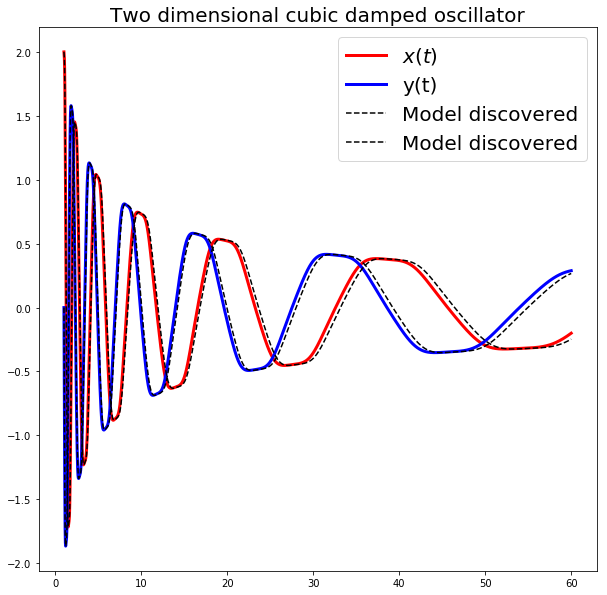

In [102]:
plt.figure(figsize=(10,10))
plt.title("Two dimensional cubic damped oscillator", fontsize=20)
plt.plot(time_points,xcubic,color='red', linewidth=3)
plt.plot(time_points,ycubic,color='b',linewidth=3)
plt.plot(time_points,x_disc3,'--k')
plt.plot(time_points,y_disc3,'--k')
plt.legend(('$x(t)$', 'y(t)','Model discovered','Model discovered'),
           loc='upper right', fontsize=20)
plt.show()